# Getting Data: Web & Text

Today we will be looking at scraping data from websites that have no API and work with manipulating text data.

## Extracting tables from websites using Pandas

Yes it is true, Pandas can do just about everything.  We will use a Pandas function that can read information from websites that is stored in tables.

### The Website: Box Office Mojo

[boxofficemojo.com](https://www.boxofficemojo.com) contains a wealth of information on the performance of movies during their theater runs.  We will practice extracting some of the information from the tables hosted on the site.

**First!** We need to check to see if the site has any policies against scraping and automated access.  Let us check their [robots.txt](https://www.boxofficemojo.com/robots.txt) file.  Click on the link and take a look.  It seems that there are some regions of the website where automated data collection is forbidden and we will make sure to avoid those places.

Now we will select a data table.  Let us look at the top movies for the weekend of January 4-6, 2019 (the first weekend in January)

https://www.boxofficemojo.com/weekend/chart/?yr=2019&wknd=01&p=.htm

You should do the following.

1. Click on the link and inspect the contents of the page.
2. While on the page, look at the structure of the HTML that is used to format the data table.  You can see the HTML of any page by inspecting the page source.  The exact way you do this depends on your browser, in Chrome it is: Click on the View menu, then Developer, then View Source.

Ok, now let's go get that data!

In [ ]:
import pandas as pd

tables = pd.read_html("https://www.boxofficemojo.com/weekend/chart/?yr=2019&wknd=01&p=.htm")

`tables` is a list of tables from the page.  Let's see how many there are.

In [ ]:
len(tables)

4

Let's see what data is in each table.

In [ ]:
for t in tables:
    display(t.head())

,0
0,Adjuster: Actuals Est. Tckts for(i=2019; i>...


,0,1
0,"January 4-6, 2019 Weekend",googletag.cmd.push(function() { googletag.def...


,0,1,2,3,4,5,6,7,8,9,...,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062
0,<<Last Weekend <Last Year,View Index: By Year | By Weekend,Next Weekend>>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TWLWTitle (click to view)StudioWeekend Gross% ...,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,...,"$3,243",-,6.0,TOTAL (87 MOVIES):,"$138,828,009",-26.2%,43279.0,-629.0,"$3,208",NaN
2,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,Aquaman,WB,"$31,003,280",-40.5%,4184,+59,"$7,410","$260,024,160",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,N,Escape Room,Sony,"$18,238,172",-,2717,-,"$6,713","$18,238,172",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11
0,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,Week #,NaN
1,1,1,Aquaman,WB,"$31,003,280",-40.5%,4184,+59,"$7,410","$260,024,160",-,3.0
2,2,N,Escape Room,Sony,"$18,238,172",-,2717,-,"$6,713","$18,238,172",$9,1.0
3,3,2,Mary Poppins Returns,BV,"$15,860,957",-44.1%,4090,-,"$3,878","$138,817,262",$130,3.0
4,4,3,Bumblebee,Par.,"$13,202,603",-36.8%,3597,+47,"$3,670","$97,555,743",$135,3.0


Ok, it looks like it is that last table which has the information we want.

In [ ]:
movieData = tables[3]

movieData.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,Week #,NaN
1,1,1,Aquaman,WB,"$31,003,280",-40.5%,4184,+59,"$7,410","$260,024,160",-,3.0
2,2,N,Escape Room,Sony,"$18,238,172",-,2717,-,"$6,713","$18,238,172",$9,1.0
3,3,2,Mary Poppins Returns,BV,"$15,860,957",-44.1%,4090,-,"$3,878","$138,817,262",$130,3.0
4,4,3,Bumblebee,Par.,"$13,202,603",-36.8%,3597,+47,"$3,670","$97,555,743",$135,3.0


The column names are stored in the first row of our data frame.  Let's fix that.

In [ ]:
movieData.columns = movieData.iloc[0]  # Set the col names to the first row
movieData = movieData.reindex(movieData.index.drop(0)) # Remove the first row

movieData.head()

,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,Week #,nan
1,1,1,Aquaman,WB,"$31,003,280",-40.5%,4184,+59,"$7,410","$260,024,160",-,3.0
2,2,N,Escape Room,Sony,"$18,238,172",-,2717,-,"$6,713","$18,238,172",$9,1.0
3,3,2,Mary Poppins Returns,BV,"$15,860,957",-44.1%,4090,-,"$3,878","$138,817,262",$130,3.0
4,4,3,Bumblebee,Par.,"$13,202,603",-36.8%,3597,+47,"$3,670","$97,555,743",$135,3.0
5,5,4,Spider-Man: Into The Spider-Verse,Sony,"$13,126,885",-30.2%,3419,-394,"$3,839","$133,978,231",$90,4.0


There is still some fixing to do because if we look at the original website **Theater Count/Change** should be split into the headers of two separate columns and the following headers shifted so that the last column header is **Week #** instead of **nan**.

In [ ]:
newcolsdict = {}
for indx in range(7,11):
    newcolsdict[movieData.columns[indx+1]] = movieData.columns[indx]
                 
newcolsdict[movieData.columns[6]] = 'Theater Count'
newcolsdict[movieData.columns[7]] = 'Change'
                 
movieData.rename(columns=newcolsdict, inplace=True)

movieData.head()

,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count,Change,Average,Total Gross,Budget*,Week #
1,1,1,Aquaman,WB,"$31,003,280",-40.5%,4184,+59,"$7,410","$260,024,160",-,3.0
2,2,N,Escape Room,Sony,"$18,238,172",-,2717,-,"$6,713","$18,238,172",$9,1.0
3,3,2,Mary Poppins Returns,BV,"$15,860,957",-44.1%,4090,-,"$3,878","$138,817,262",$130,3.0
4,4,3,Bumblebee,Par.,"$13,202,603",-36.8%,3597,+47,"$3,670","$97,555,743",$135,3.0
5,5,4,Spider-Man: Into The Spider-Verse,Sony,"$13,126,885",-30.2%,3419,-394,"$3,839","$133,978,231",$90,4.0


Perfect!  Now we shall take a look at the data by making some scatter plots to investigate relationships between pairs of columns.  First, we can compare **Weekend Gross** with **Week #** to see if new movies make more money than those that have been out for a while. 

Hmm, looking at **Weekend Gross**, we can see there are dollar signs in the values given which means that those entries are not just numbers.  This could confuse our plotting routines.

In [ ]:
movieData.dtypes

0
TW                        object
LW                        object
Title (click to view)     object
Studio                    object
Weekend Gross             object
% Change                  object
Theater Count             object
Change                    object
Average                   object
Total Gross               object
Budget*                   object
Week #                   float64
dtype: object

In [ ]:
# Get rid of dollar signs and commas then cast as a number
movieData["Weekend Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData["Weekend Gross"] = movieData["Weekend Gross"].apply(pd.to_numeric)

# Do Total Gross too
movieData["Total Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData["Total Gross"] = movieData["Total Gross"].apply(pd.to_numeric)

movieData.dtypes

0
TW                        object
LW                        object
Title (click to view)     object
Studio                    object
Weekend Gross              int64
% Change                  object
Theater Count             object
Change                    object
Average                   object
Total Gross              float64
Budget*                   object
Week #                   float64
dtype: object

Text(0.5, 6.79999999999999, 'Week Number')

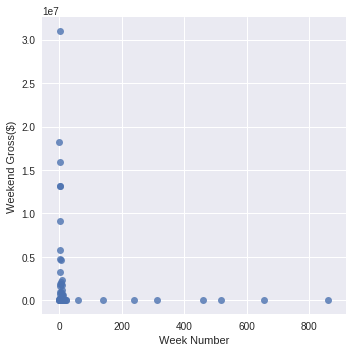

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='Week #', y='Weekend Gross', data=movieData, fit_reg=False)
ax = plt.gca()
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Week Number')

It looks like some movies have crazy long runs, which is making our plot difficult to interpret.  Let us restrict the plot to show just the first 20 weeks.

Text(0.5, 6.79999999999999, 'Week Number')

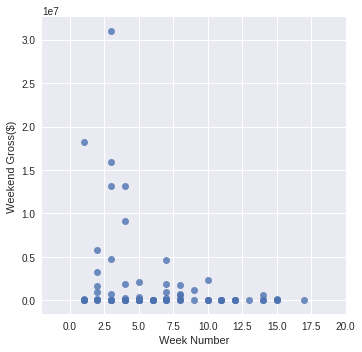

In [ ]:
sns.lmplot(x='Week #', y='Weekend Gross', data=movieData, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 20)
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Week Number')

Now let's look to see if movies that have been out longer make more money overall.

Text(0.5, 6.79999999999999, 'Week Number')

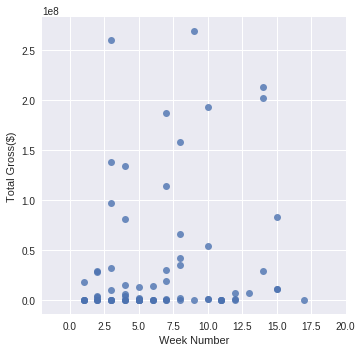

In [ ]:
sns.lmplot(x='Week #', y='Total Gross', data=movieData, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 20)
ax.set_ylabel('Total Gross(\$)')
ax.set_xlabel('Week Number')

In [ ]:
# TASK 1: Repeat the above analysis for the most recent weekend.

import pandas as pd

tables1 = pd.read_html("https://www.boxofficemojo.com/weekend/chart/?yr=2019&wknd=08&p=.htm")


In [ ]:
for t in tables1:
    display(t.head())

,0
0,Adjuster: Actuals Est. Tckts for(i=2019; i>...


,0,1
0,"February 22-24, 2019 Weekend",googletag.cmd.push(function() { googletag.def...


,0,1,2,3,4,5,6,7,8,9,...,609,610,611,612,613,614,615,616,617,618
0,<<Last Weekend <Last Year,View Index: By Year | By Weekend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TWLWTitle (click to view)StudioWeekend Gross% ...,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,...,"$94,536",-,6.0,TOTAL (50 MOVIES):,"$127,452,172",+0.9%,41379.0,-4283.0,"$3,080",NaN
2,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,How to Train Your Dragon: The Hidden World,Uni.,"$55,527,000",-,4259,-,"$13,038","$58,027,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,Alita: Battle Angel,Fox,"$12,000,000",-57.9%,3802,+12,"$3,156","$60,681,068",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11
0,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,Week #,NaN
1,1,N,How to Train Your Dragon: The Hidden World,Uni.,"$55,527,000",-,4259,-,"$13,038","$58,027,000",$129,1.0
2,2,1,Alita: Battle Angel,Fox,"$12,000,000",-57.9%,3802,+12,"$3,156","$60,681,068",$170,2.0
3,3,2,The LEGO Movie 2: The Second Part,WB,"$10,015,000",-51.9%,3833,-470,"$2,613","$83,619,039",-,3.0
4,4,41,Fighting with My Family,MGM,"$8,012,000","+5,673.2%",2711,"+2,707","$2,955","$8,227,021",-,2.0


In [ ]:
movieData1 = tables1[3]

movieData1.head()


movieData1.columns = movieData1.iloc[0]  # Set the col names to the first row
movieData1 = movieData1.reindex(movieData1.index.drop(0)) # Remove the first row

movieData1.head()

,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count / Change,Average,Total Gross,Budget*,Week #,nan
1,1,N,How to Train Your Dragon: The Hidden World,Uni.,"$55,527,000",-,4259,-,"$13,038","$58,027,000",$129,1.0
2,2,1,Alita: Battle Angel,Fox,"$12,000,000",-57.9%,3802,+12,"$3,156","$60,681,068",$170,2.0
3,3,2,The LEGO Movie 2: The Second Part,WB,"$10,015,000",-51.9%,3833,-470,"$2,613","$83,619,039",-,3.0
4,4,41,Fighting with My Family,MGM,"$8,012,000","+5,673.2%",2711,"+2,707","$2,955","$8,227,021",-,2.0
5,5,3,Isn't It Romantic,WB (NL),"$7,510,000",-47.3%,3444,-,"$2,181","$33,768,742",-,2.0


In [ ]:
newcolsdict1 = {}
for indx in range(7,11):
    newcolsdict1[movieData1.columns[indx+1]] = movieData1.columns[indx]
                 
newcolsdict1[movieData1.columns[6]] = 'Theater Count'
newcolsdict1[movieData1.columns[7]] = 'Change'
                 
movieData1.rename(columns=newcolsdict1, inplace=True)

movieData1.head()

,TW,LW,Title (click to view),Studio,Weekend Gross,% Change,Theater Count,Change,Average,Total Gross,Budget*,Week #
1,1,N,How to Train Your Dragon: The Hidden World,Uni.,"$55,527,000",-,4259,-,"$13,038","$58,027,000",$129,1.0
2,2,1,Alita: Battle Angel,Fox,"$12,000,000",-57.9%,3802,+12,"$3,156","$60,681,068",$170,2.0
3,3,2,The LEGO Movie 2: The Second Part,WB,"$10,015,000",-51.9%,3833,-470,"$2,613","$83,619,039",-,3.0
4,4,41,Fighting with My Family,MGM,"$8,012,000","+5,673.2%",2711,"+2,707","$2,955","$8,227,021",-,2.0
5,5,3,Isn't It Romantic,WB (NL),"$7,510,000",-47.3%,3444,-,"$2,181","$33,768,742",-,2.0


In [ ]:
# Get rid of dollar signs and commas then cast as a number
movieData1["Weekend Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData1["Weekend Gross"] = movieData["Weekend Gross"].apply(pd.to_numeric)

# Do Total Gross too
movieData1["Total Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData1["Total Gross"] = movieData["Total Gross"].apply(pd.to_numeric)

movieData1.dtypes

0
TW                        object
LW                        object
Title (click to view)     object
Studio                    object
Weekend Gross              int64
% Change                  object
Theater Count             object
Change                    object
Average                   object
Total Gross              float64
Budget*                   object
Week #                   float64
dtype: object

Text(0.5, 6.79999999999999, 'Week Number')

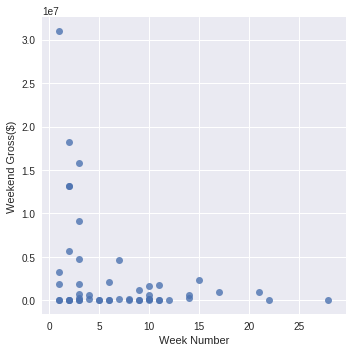

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='Week #', y='Weekend Gross', data=movieData1, fit_reg=False)
ax = plt.gca()
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Week Number')

Text(0.5, 6.79999999999999, 'Week Number')

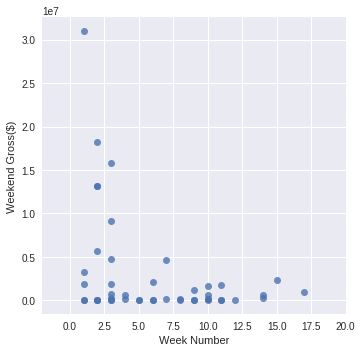

In [ ]:
sns.lmplot(x='Week #', y='Weekend Gross', data=movieData1, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 20)
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Week Number')

Text(0.5, 6.79999999999999, 'Week Number')

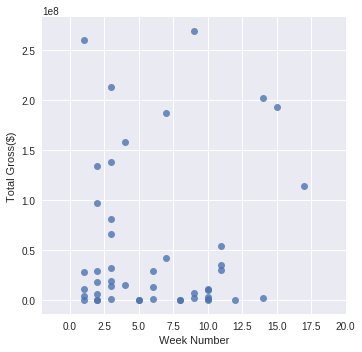

In [ ]:
sns.lmplot(x='Week #', y='Total Gross', data=movieData1, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 20)
ax.set_ylabel('Total Gross(\$)')
ax.set_xlabel('Week Number')

## Beautiful Soup

The Pandas read_html function works great for simple tables.  For websites that contain information in a less structured format, we will need to use an HTML parser, such as Beautiful Soup.

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

We will use Beautiful Soup to extract information from the archive of National Public Radio technology news stories.  

**First** have a look at NPR's [robots.txt](https://www.npr.org/robots.txt)

There is nothing there that disallows scraping of the news stories.

Now we will get the html from [here](https://www.npr.org/sections/technology/archive) and inspect it.  You should open this page in a different tab so that you can compare the html with the page.

In [ ]:
url = 'https://www.npr.org/sections/technology/archive'
html = requests.get(url).text

soup = BeautifulSoup(html, 'html5lib') # parse the html

print(soup.prettify()) # print a nicely formatted look at the html

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <script>
   try {var _sf_startpt=(new Date()).getTime();} catch(e){}
  </script>
  <meta itemref="speakable" itemscope="" itemtype="https://schema.org/SpeakableSpecification"/>
  <title>
   Technology : NPR
  </title>
  <meta content="[data-is-speakable]" id="speakable" itemprop="cssSelector"/>
  <meta content="1VqzbDm4ukeFVHOoq5LjIKA2fVKZD-EYv8cXZhKXSfU" id="google-site-verification" name="google-site-verification"/>
  <meta charset="utf-8"/>
  <meta content="noarchive,index,nofollow" name="robots"/>
  <meta content="General" name="Rating"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta name="npr-pjax"/>
  <meta content="2009-07-21" name="date"/>
  <link href="https://www.npr.org/sections/technology/" rel="canonical"/>
  <meta content="Latest technology news and breakthroughs in technology, science, and industry. Download the NPR Technology podcast and Technology RSS feed." nam

You will need to scroll down a ways to start seeing the stories.  Here is the html for an example story:

Each article entry is spanned by `<article></article>` tags.  We will first pull out all of these articles.

In [ ]:
articles = soup.find_all('article')
len(articles)  # How many articles did we get?

17

In [ ]:
articles[0] # Look at the content of the first article

<article class="item has-image">
    <div class="item-image">
        <div class="imagewrap" data-crop-type="wide">
    <a data-metrics='{"action":"Click Story Image","category":"Story List"}' href="https://www.npr.org/2019/02/25/697090168/as-payments-go-social-with-venmo-theyre-changing-personal-relationships">
        <img alt="As Payments Go Social With Venmo, They're Changing Personal Relationships" class="respArchListImg lazyOnLoad" data-original="https://media.npr.org/assets/img/2019/02/22/_dsc0115_wide-9fd6d58cbde3ce4790bf89ae12b77b9bd7b60cd4-s300.jpg" src="https://media.npr.org/assets/img/2019/02/22/_dsc0115_wide-9fd6d58cbde3ce4790bf89ae12b77b9bd7b60cd4-s300-c15.jpg"/>
    </a>
</div>
<div class="credit-caption">
    <div class="caption-wrap">
        <div aria-label="Image caption" class="caption">
            <p>
                Venmo is used to pay or request money from other people on the app. Every transaction has a memo line, and the app suggests emoji instead of words li

The data about the article is stored in `<div>` elements.  We can find the title of the first story by finding the `<div>` element with the `item-info` attribute.  The title is the text portion under a header element.  

In [ ]:
title = articles[0].find("div", "item-info").h2.text
title

"As Payments Go Social With Venmo, They're Changing Personal Relationships"

There is a blurb or "teaser" describing the article that is also stored in the `<div>` element with the `item-info` attribute.

In [ ]:
teaser = articles[0].find("div", "item-info").p.text
teaser

"February 25, 2019 • More people are using mobile money apps to pay each other without cash. With Venmo, its social network is a key part of the payment process, and it's changing people's behavior in unexpected ways."

We can see that the `<p>` element contains both the date and the teaser, which we want to separate.

In [ ]:
date = articles[0].find("div", "item-info").p.span.text
date

'February 25, 2019 • '

In [ ]:
teaser = teaser.replace(date, '')
teaser

"More people are using mobile money apps to pay each other without cash. With Venmo, its social network is a key part of the payment process, and it's changing people's behavior in unexpected ways."

The date can be split into month, day and year using regular expressions. Putting round parentheses `()` around a part of the regular expression designates it as a group that can be referenced once a match has been found.

In [ ]:
import re

dmatch = re.match(r'([a-zA-Z]+) (\d+), (\d+)', date)
print('The whole match = ', dmatch.group(0))
month = dmatch.group(1)
print('Month = ', month)
day = dmatch.group(2)
print('Day = ', day)
year = dmatch.group(3)
print('Year = ', year)

The whole match =  February 25, 2019
Month =  February
Day =  25
Year =  2019


Lastly, we will want to extract the url for the article.

In [ ]:
url = articles[0].find("div", "item-info").h2.a.get('href')
url

'https://www.npr.org/2019/02/25/697090168/as-payments-go-social-with-venmo-theyre-changing-personal-relationships'

In [ ]:
# TASK 2 - In the <p class="teaser"> element there is a <time> element that contains the 
# date in a the format 2019-01-15 
# Extract this date for articles[0] and store it in a variable called date2

date2 = articles[0].find("div", "item-info").p.span.text
date2

'February 25, 2019 • '

Now that we have had some practice with a single article, we will pull out the above information for all of the articles.

In [ ]:
def isaudio(article):
    """isaudio(article)
    Some "articles" are not true articles but just add buttons
    to the previously listed article to play an audio version 
    of the story
    Input: article
    Output: returns True if the article is audio buttons, False
    otherwise"""
     
    return article.get('class')[0] == 'bucketwrap'

def articleinfo(article):
    """title, teaser, date, url = articleinfo(article)
    articleinfo - pulls information from an article's html 
    Input: article
    Outputs: title, teaser, date, url"""
    
    # Skip audio-module "articles" which are not true articles
    # but just add buttons to play audio
    
    if not isaudio(article):
        title = article.find("div", "item-info").h2.text
        teaser = article.find("div", "item-info").p.text
        date = article.find("div", "item-info").p.span.text
        teaser = teaser.replace(date, '')
        url = article.find("div", "item-info").h2.a.get('href')
    else:
        title = []
        teaser = []
        date = []
        url = []
    
    return (title, teaser, date, url)


In [ ]:
titles = []
teasers = []
dates = []
urls = []

for article in articles:
    title, teaser, date, url = articleinfo(article)
    if title != []:
        titles.append(title)
        teasers.append(teaser)
        dates.append(date)
        urls.append(url)

In [ ]:
# Parse the dates
months = []
days = []
years = []
for date in dates:
    dmatch = re.match(r'([a-zA-Z]+) (\d+), (\d+)', date)
    months.append(dmatch.group(1))
    days.append(dmatch.group(2))
    years.append(dmatch.group(3))

Now we will build a pandas DataFrame with our information.

In [ ]:
nprtech = pd.DataFrame({'Title': titles, 'Teaser': teasers, 'Month': months,
                       'Day': days, 'Year': year, 'url': urls})
nprtech.head()

,Day,Month,Teaser,Title,Year,url
0,25,February,More people are using mobile money apps to pay...,"As Payments Go Social With Venmo, They're Chan...",2019,https://www.npr.org/2019/02/25/697090168/as-pa...
1,24,February,"The 2020 campaign may just be starting, but di...",Twitter Trolls And 2020,2019,https://www.npr.org/2019/02/24/697481316/twitt...
2,22,February,"They say Microsoft's contract ""crossed the lin...",Microsoft Workers Protest Army Contract With T...,2019,https://www.npr.org/2019/02/22/697110641/micro...
3,22,February,"Since 2017, the social media website Pinterest...",How Pinterest Jumped Into The Fight Against He...,2019,https://www.npr.org/2019/02/22/697152943/how-p...
4,22,February,We want to hear from any parents who have post...,Do You Post About Your Kids Online — And Talk ...,2019,https://www.npr.org/2019/02/22/696924139/do-yo...


In [ ]:
# Task 3 - Repeat the work above to collect article information from NPR's science archive
# https://www.npr.org/sections/science/archive
# Put the information in a pandas DataFrame called nprsci and then merge the two into a single 
# DataFrame via
# nprscitech = nprsci.append(nprtech, ignore_index=True)

url = 'https://www.npr.org/sections/science/archive'
html = requests.get(url).text

soup = BeautifulSoup(html, 'html5lib') 

print(soup.prettify()) 

<!DOCTYPE html>
<html class="no-js" lang="en">
 <head>
  <script>
   try {var _sf_startpt=(new Date()).getTime();} catch(e){}
  </script>
  <meta itemref="speakable" itemscope="" itemtype="https://schema.org/SpeakableSpecification"/>
  <title>
   Science : NPR
  </title>
  <meta content="[data-is-speakable]" id="speakable" itemprop="cssSelector"/>
  <meta content="1VqzbDm4ukeFVHOoq5LjIKA2fVKZD-EYv8cXZhKXSfU" id="google-site-verification" name="google-site-verification"/>
  <meta charset="utf-8"/>
  <meta content="noarchive,index,nofollow" name="robots"/>
  <meta content="General" name="Rating"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta name="npr-pjax"/>
  <meta content="2005-07-14" name="date"/>
  <link href="https://www.npr.org/sections/science/" rel="canonical"/>
  <meta content="The latest health and science news. Updates on medicine, healthy living, nutrition, drugs, diet, and advances in science and technology. Subscribe to 

In [ ]:
date3 = articles[0].find("div", "item-info").p.span.text
date3

'February 25, 2019 • '

In [ ]:
def isaudio(article):
    """isaudio(article)
    Some "articles" are not true articles but just add buttons
    to the previously listed article to play an audio version 
    of the story
    Input: article
    Output: returns True if the article is audio buttons, False
    otherwise"""
     
    return article.get('class')[0] == 'bucketwrap'

def articleinfo(article):
    """title, teaser, date, url = articleinfo(article)
    articleinfo - pulls information from an article's html 
    Input: article
    Outputs: title, teaser, date, url"""
    
    # Skip audio-module "articles" which are not true articles
    # but just add buttons to play audio
    
    if not isaudio(article):
        title = article.find("div", "item-info").h2.text
        teaser = article.find("div", "item-info").p.text
        date = article.find("div", "item-info").p.span.text
        teaser = teaser.replace(date, '')
        url = article.find("div", "item-info").h2.a.get('href')
    else:
        title = []
        teaser = []
        date = []
        url = []
    
    return (title, teaser, date, url)


In [ ]:
titles = []
teasers = []
dates = []
urls = []

for article in articles:
    title, teaser, date, url = articleinfo(article)
    if title != []:
        titles.append(title)
        teasers.append(teaser)
        dates.append(date)
        urls.append(url)

In [ ]:
# Parse the dates
months = []
days = []
years = []
for date in dates:
    dmatch = re.match(r'([a-zA-Z]+) (\d+), (\d+)', date)
    months.append(dmatch.group(1))
    days.append(dmatch.group(2))
    years.append(dmatch.group(3))

In [ ]:
nprsci = pd.DataFrame({'Title': titles, 'Teaser': teasers, 'Month': months,
                       'Day': days, 'Year': year, 'url': urls})
nprsci.head()

,Day,Month,Teaser,Title,Year,url
0,25,February,Research suggests the more of your childhood t...,Greener Childhood Associated With Happier Adul...,2019,https://www.npr.org/sections/health-shots/2019...
1,25,February,Days before President Trump and Kim Jong Un ar...,"On Eve Of 2nd Trump-Kim Summit, Is North Korea...",2019,https://www.npr.org/2019/02/25/696565273/on-ev...
2,24,February,In our recent story on the evolutionary benefi...,"Life Lessons From Grandma: Eat Last, Ignore Na...",2019,https://www.npr.org/sections/goatsandsoda/2019...
3,24,February,"It's scary out there: violent supernovas, biol...",Author Bob Berman On 'Hazards To Life In Our U...,2019,https://www.npr.org/2019/02/24/697481379/autho...
4,24,February,Oysters in the Gulf of Mexico are not doing we...,Saving The Gulf Of Mexico's Oysters,2019,https://www.npr.org/2019/02/24/697481330/savin...


In [ ]:
nprscitech = nprsci.append(nprtech, ignore_index=True)

Are there any technology articles about Facebook?

In [ ]:
nprtech[nprtech['Title'].str.contains("Facebook") | nprtech['Teaser'].str.contains("Facebook")]

,Day,Month,Teaser,Title,Year,url
8,21,February,"Following the unsealing of court documents, ch...",Advocates Ask FTC 'To Hold Facebook Accountabl...,2019,https://www.npr.org/2019/02/21/696430478/advoc...
10,18,February,"""The age of inadequate self-regulation must co...","Facebook Has Behaved Like 'Digital Gangsters,'...",2019,https://www.npr.org/2019/02/18/695729829/faceb...


In [ ]:
# Task 4
# Search the collected news articles for another tech company or term of your choice

In [ ]:
nprtech[nprtech['Title'].str.contains("Twitter") | nprtech['Teaser'].str.contains("Twitter")]

,Day,Month,Teaser,Title,Year,url
1,24,February,"The 2020 campaign may just be starting, but di...",Twitter Trolls And 2020,2019,https://www.npr.org/2019/02/24/697481316/twitt...
